In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

EPOCHS = 20
BATCH_SIZE = 1


In [ ]:
# load training and testing data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# standardization
mean = np.mean(train_images)
stddev = np.std(train_images)
train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

# one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# 權重初始化物件
initializer = keras.initializers.RandomUniform(minval=-0.1, maxval=0.1)


# 創建以下結構的序列式模型：
# 輸入變量784個
# 雙密集（全連接）層，各含25、10個神經元
# 隱藏層激活函數為tanh
# 輸出層以邏輯函數（sigmoid）激活
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation='tanh',
                       kernel_initializer=initializer,
                       bias_initializer='zeros'),
    keras.layers.Dense(10, activation='sigmoid',
                       kernel_initializer=initializer,
                       bias_initializer='zeros')])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,885 (77.68 KB)

 Trainable params: 19,885 (77.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 除了使用隨機梯度下降法（SGD）
# 與學習率0.01以外，無其他有的沒的
# 損失以MSE計量，訓練全程監看準確率
opt = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss='mean_squared_error', optimizer = opt,
              metrics =['accuracy'])
# 模型訓練週期為20
# 每週期開始時重新（隨機）打散樣本順序
# 批次量為1（batch_size=1），一批次結束時更新權重
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    verbose=2, shuffle=True)


Epoch 1/20
60000/60000 - 139s - 2ms/step - accuracy: 0.6952 - loss: 0.0523 - val_accuracy: 0.8807 - val_loss: 0.0272
Epoch 2/20
60000/60000 - 140s - 2ms/step - accuracy: 0.8928 - loss: 0.0219 - val_accuracy: 0.9121 - val_loss: 0.0178
Epoch 3/20
60000/60000 - 142s - 2ms/step - accuracy: 0.9127 - loss: 0.0167 - val_accuracy: 0.9164 - val_loss: 0.0154
Epoch 4/20
60000/60000 - 135s - 2ms/step - accuracy: 0.9206 - loss: 0.0147 - val_accuracy: 0.9226 - val_loss: 0.0139
Epoch 5/20
60000/60000 - 143s - 2ms/step - accuracy: 0.9261 - loss: 0.0135 - val_accuracy: 0.9263 - val_loss: 0.0131
Epoch 6/20
60000/60000 - 144s - 2ms/step - accuracy: 0.9296 - loss: 0.0127 - val_accuracy: 0.9306 - val_loss: 0.0124
Epoch 7/20
60000/60000 - 137s - 2ms/step - accuracy: 0.9327 - loss: 0.0121 - val_accuracy: 0.9337 - val_loss: 0.0119
Epoch 8/20
60000/60000 - 144s - 2ms/step - accuracy: 0.9352 - loss: 0.0116 - val_accuracy: 0.9343 - val_loss: 0.0115
Epoch 9/20
60000/60000 - 141s - 2ms/step - accuracy: 0.9374 - lo

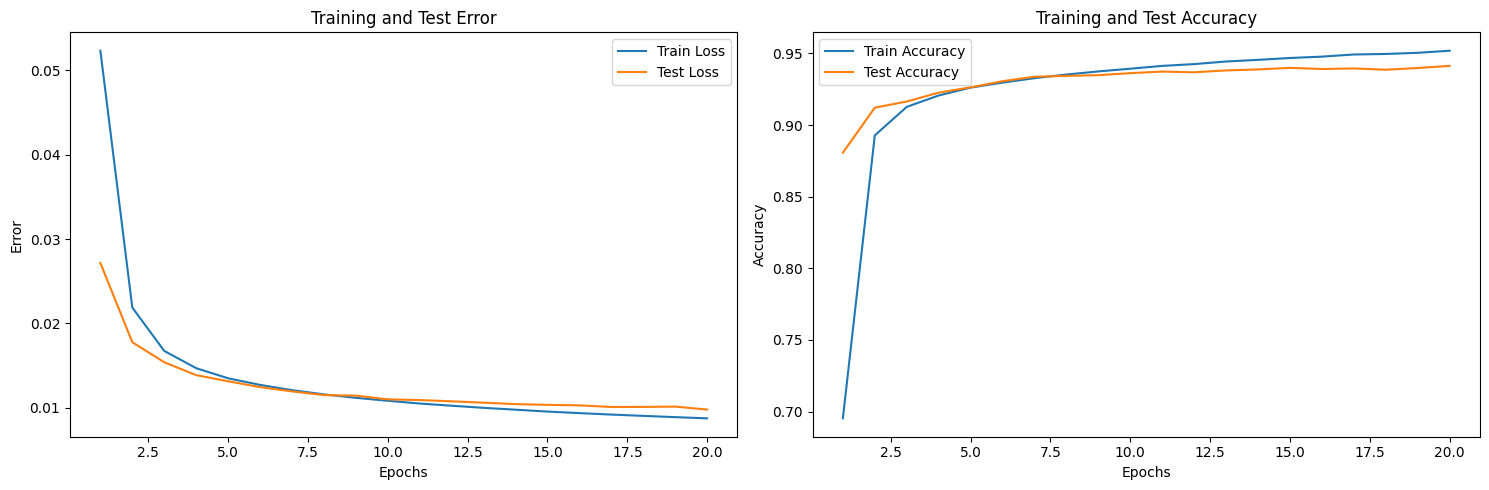

In [ ]:
import matplotlib.pyplot as plt

# Load training histroy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(1, EPOCHS + 1, 1)
plt.figure(figsize=(15, 5))

# Show loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Test Error')
plt.legend()

# Show accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
prediction = model.predict(test_images[:5])
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


array([[2.3932243e-03, 2.3173345e-03, 2.8411698e-02, 3.4776039e-02,
        4.2185368e-04, 4.0405830e-05, 8.8253018e-04, 9.9372983e-01,
        2.6027383e-03, 8.7425479e-04],
       [6.7713736e-03, 5.6120101e-03, 9.8122877e-01, 1.9074162e-02,
        4.7414756e-04, 1.2224156e-03, 1.1004968e-02, 4.6183143e-04,
        4.9807853e-03, 1.9405739e-05],
       [1.3430534e-04, 9.7588366e-01, 3.9473898e-03, 2.9808716e-04,
        2.4659587e-03, 3.6934845e-03, 1.9609787e-02, 1.4541973e-02,
        4.7268728e-03, 4.1180640e-03],
       [9.6856177e-01, 2.9464767e-04, 9.5781991e-03, 3.5386209e-03,
        2.2205424e-04, 3.5602907e-03, 7.5559542e-03, 1.5810658e-03,
        6.3981926e-03, 1.3404352e-02],
       [7.0330559e-04, 1.0262517e-03, 3.0972490e-03, 2.5707652e-04,
        9.5331526e-01, 1.3043886e-03, 5.8406857e-03, 1.0386995e-02,
        1.2595014e-02, 5.4952372e-02]], dtype=float32)

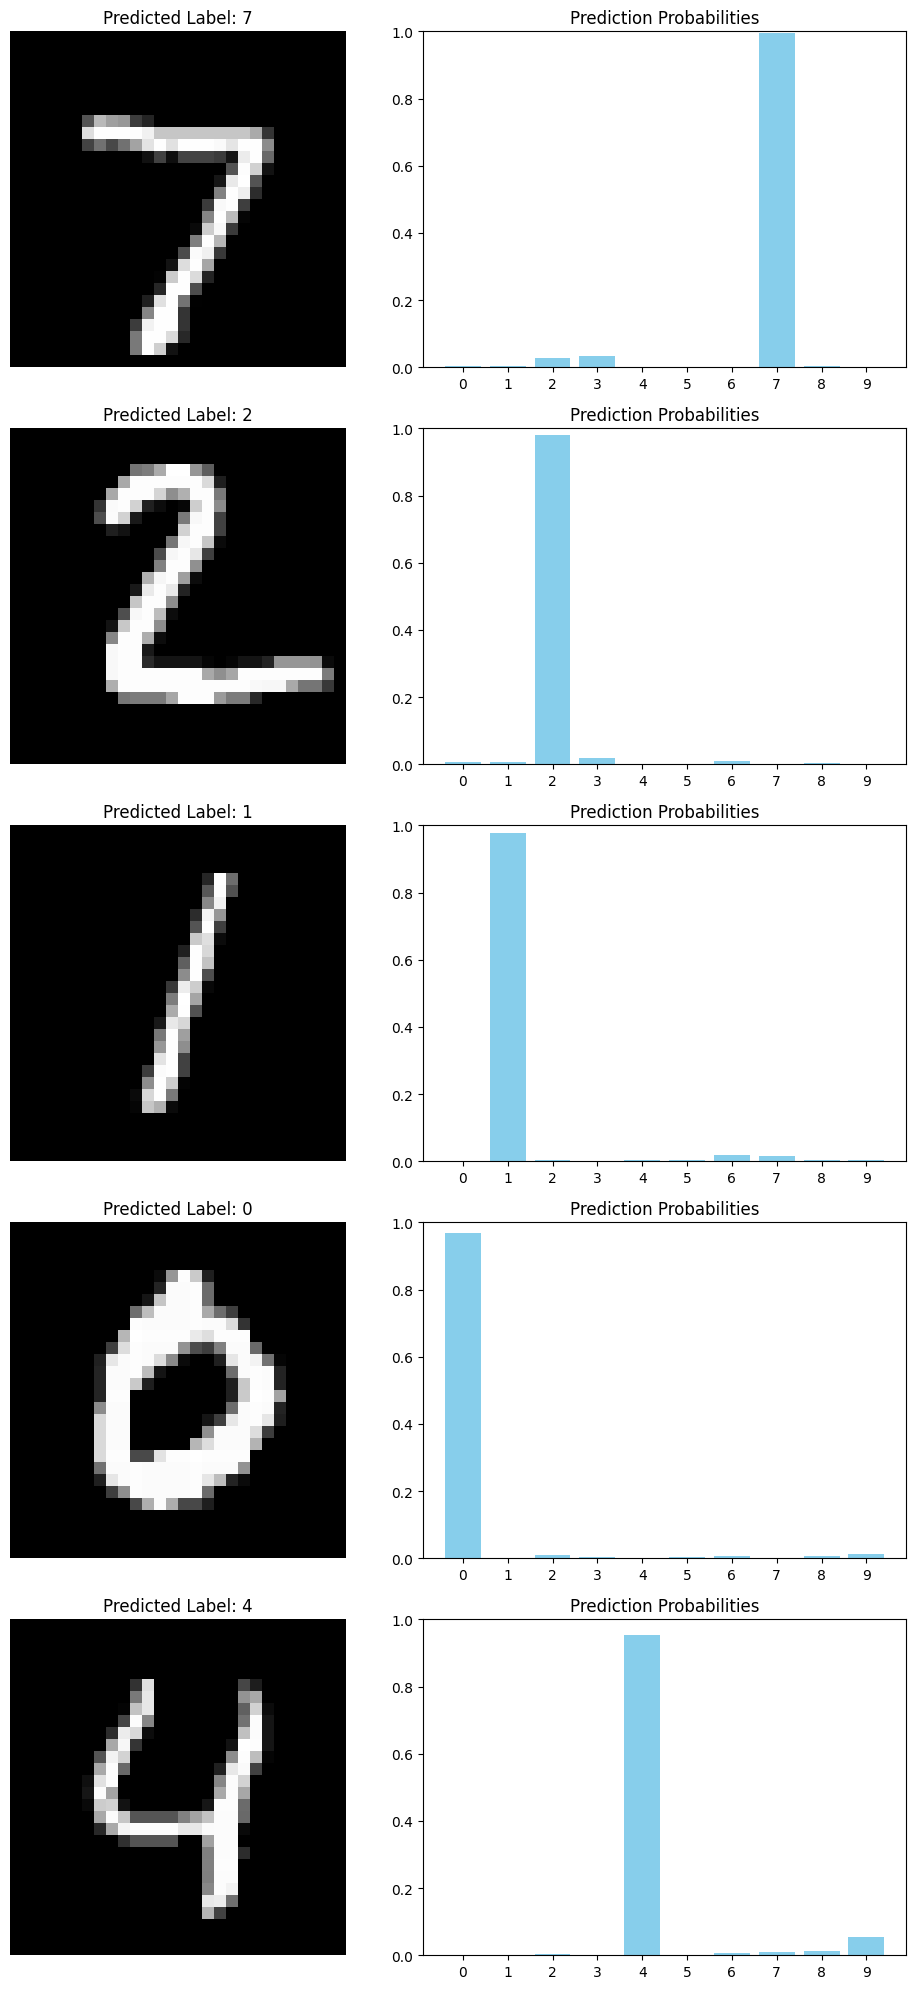

In [ ]:
num_images = len(prediction)
plt.figure(figsize=(10, 4 * num_images))

for i in range(num_images):
    # Show the image
    plt.subplot(num_images, 2, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted Label: {np.argmax(prediction[i])}")
    plt.axis('off')

    # Show the bar chart of probabilities
    plt.subplot(num_images, 2, 2 * i + 2)
    plt.bar(np.arange(10), prediction[i], color='skyblue')
    plt.xticks(np.arange(10))
    plt.ylim(0, 1)
    plt.title("Prediction Probabilities")

plt.tight_layout()
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
new_model = keras.models.load_model('model.h5')
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9413 - loss: 0.0098
